In [1]:
import os
import sys

# Get the path to the `src` directory
src_path = os.path.relpath('..')
sys.path.append(src_path)

from typing import List
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from src.types import *
from src.clustering.random import RandomClustering
from src.clustering.louvain import LouvainClustering

%load_ext autoreload
%autoreload 2

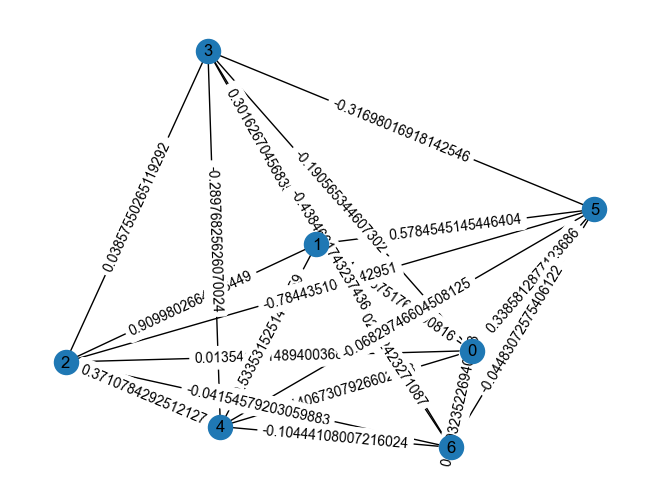

In [15]:
T = 15

# Load data from a JSONL file
market = Market.from_jsonl("./tick_data.jsonl")

# Get periods of length 15
periods = market.get_periods(period_length=3)

# Build the graph
state_graph = market.build_graph(periods, 0)

clustering = LouvainClustering().fit(periods, G=state_graph)

In [16]:
# Get the clusters
clusters = clustering.clusters

print(f"Number of periods: {len(periods)}")
print(f"Number of clusters: {len(clusters)}")
print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
print(f"Cluster labels: {clustering.labels}")
#print(f"Cluster centers: {clustering.cluster_centers}")
print(f"Transition matrix: \n{clustering.transition_matrix}")

Number of periods: 7
Number of clusters: 2
Cluster sizes: [4, 3]
Cluster labels: [0 1 1 1 0 0 0]
Transition matrix: 
[[0.75       0.25      ]
 [0.33333333 0.66666667]]


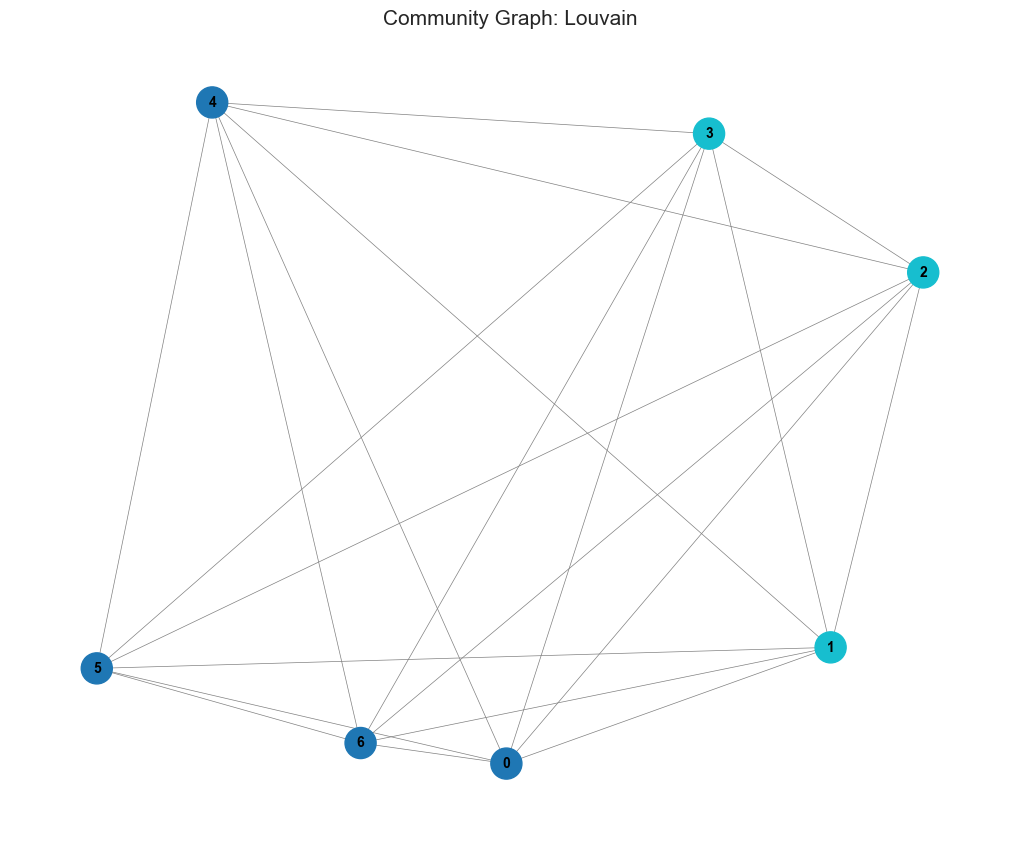

In [17]:
clustering.plot_community_graph(state_graph, method='Louvain')

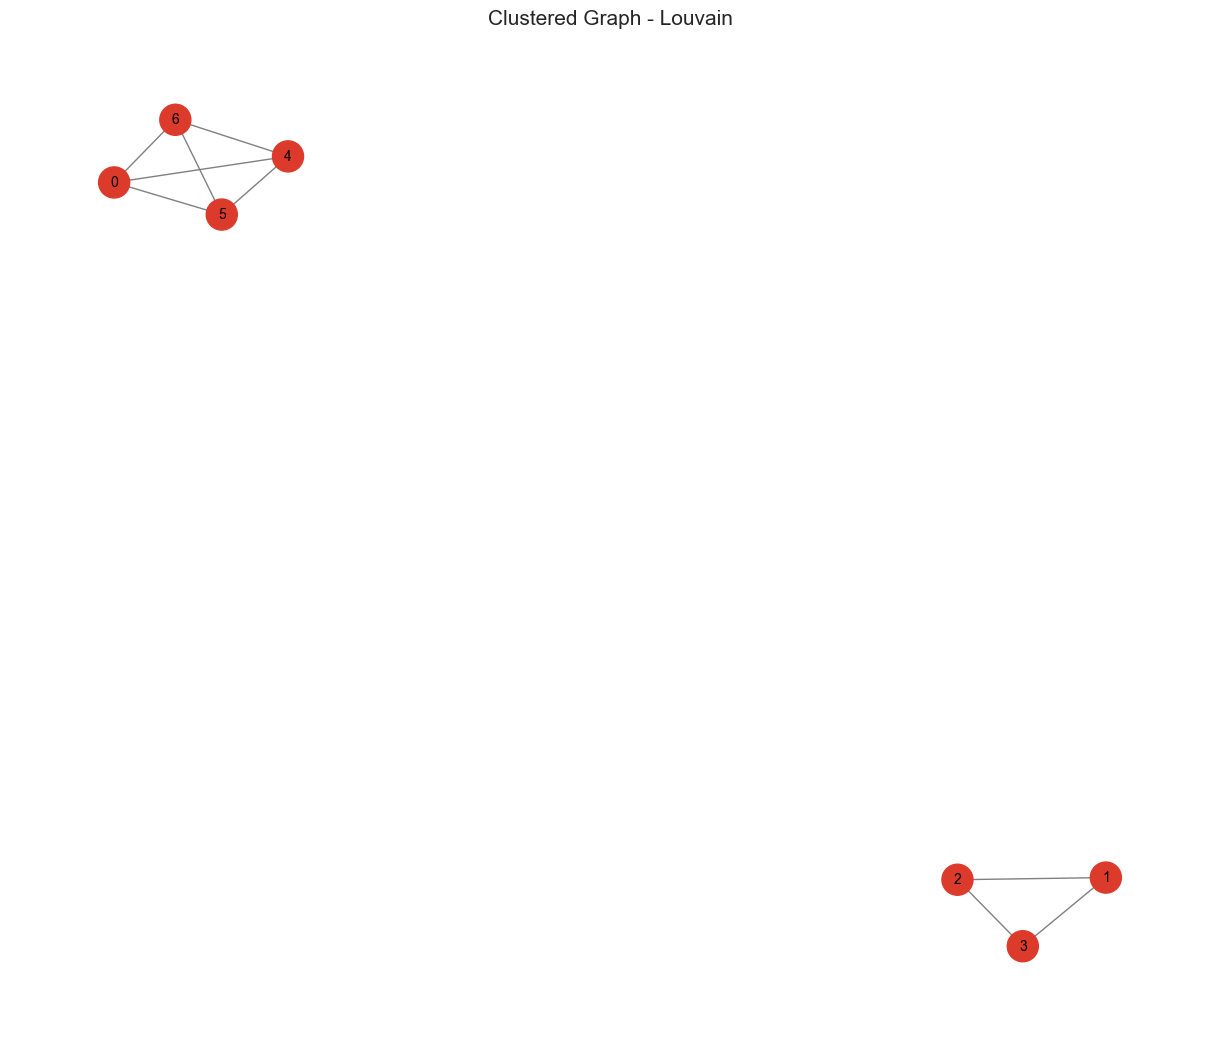

In [38]:
clustering.plot_cluster(state_graph, periods, method='Louvain')

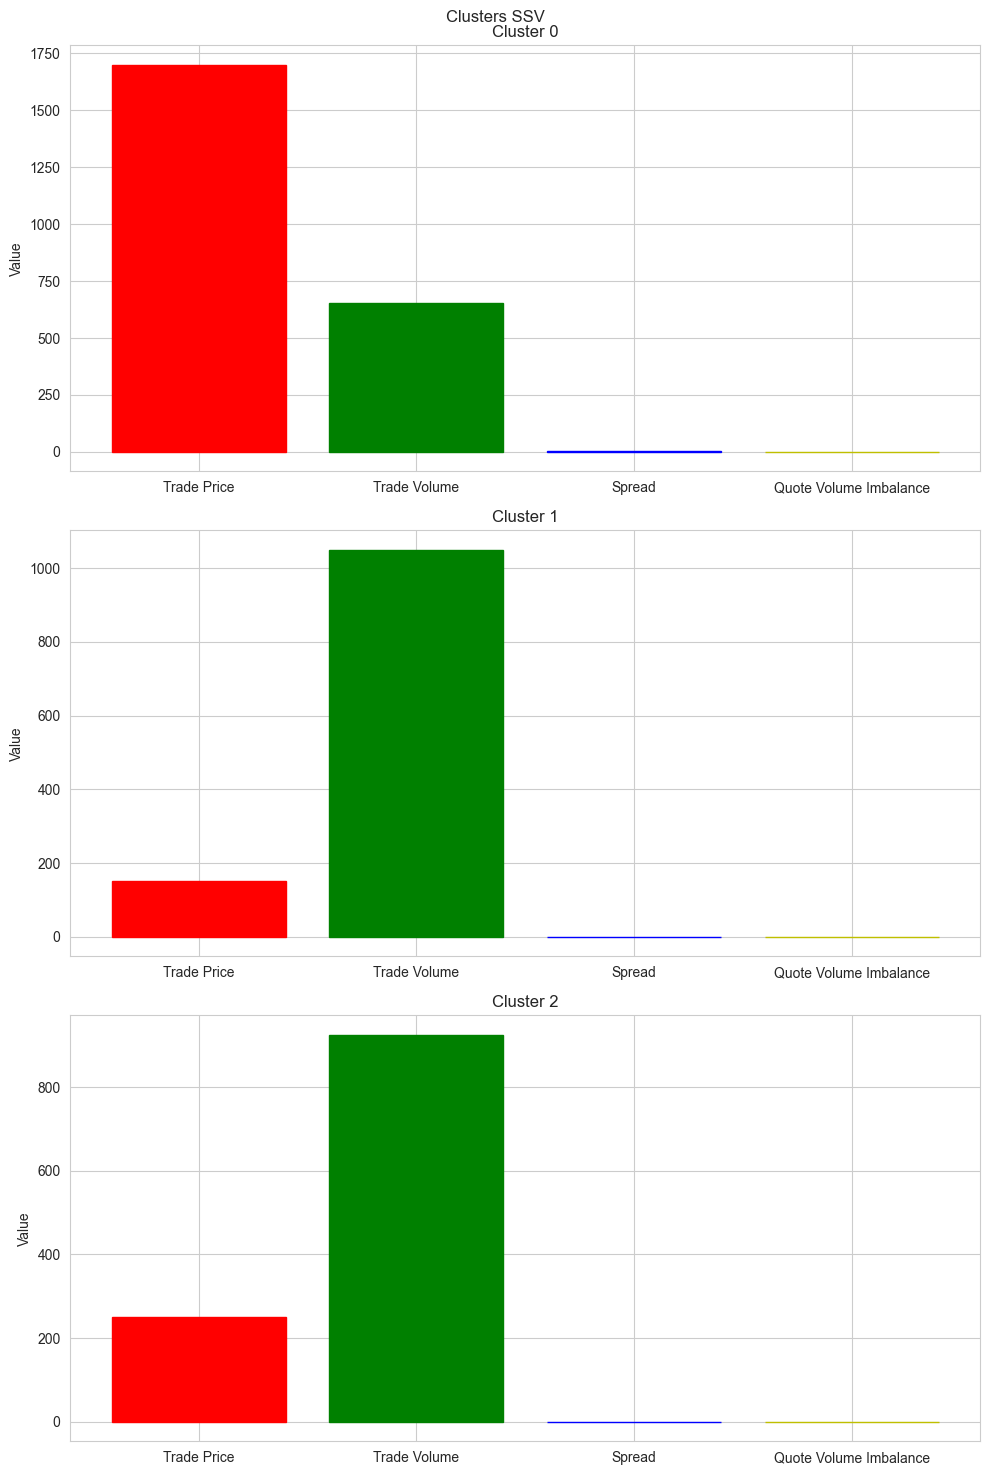

In [37]:
clustering.plot_ssv()